In [1]:
import pandas as pd
import fastf1 as ff1
import matplotlib.pyplot as plt
from f1_functions import get_lap_times

In [2]:
ff1.Cache.enable_cache('cache')

In [3]:
year = 2023
circuits = ['Bahrain', 'Saudi Arabia', 'Australia']
race_type = 'R'

df = pd.DataFrame()

for race in circuits:
    df = get_lap_times(df, year, race, race_type)

/home/vscode/.local/lib/python3.9/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/home/vscode/.local/lib/python3.9/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/home/vscode/.local/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with 

In [8]:
df.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Stint', 'LapStartTime', 'Team',
       'Driver', 'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')

In [6]:
driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()

In [12]:
driver_stints[driver_stints['Driver'] == 'ALB']

,Driver,Stint,Compound,StintLength
0,ALB,1,MEDIUM,7


In [10]:
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})

driver_stints = driver_stints.sort_values(by=['Stint'])


In [8]:
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
}

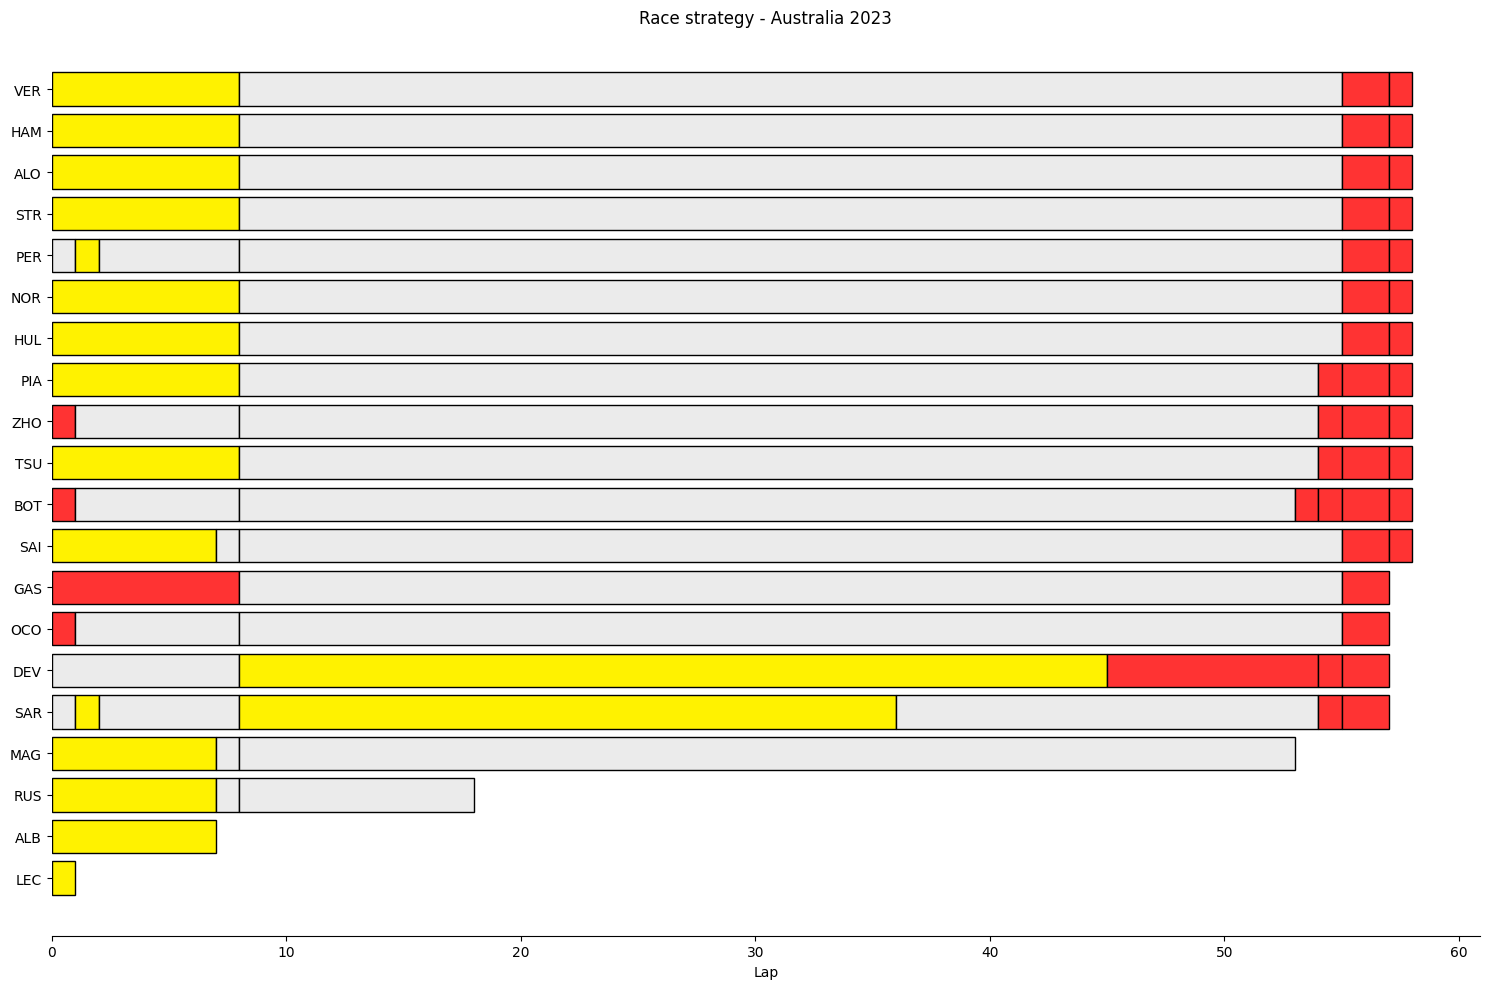

In [11]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

for driver in race.results['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]

    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            [driver],
            stint['StintLength'],
            left=previous_stint_end,
            color=compound_colors[stint['Compound']],
            edgecolor="black"
        )

        previous_stint_end = previous_stint_end + stint['StintLength']

# Set title
plt.title(f'Race strategy - {circuit} {year}')

# Set x-label
plt.xlabel('Lap')

# Invert y-axis
plt.gca().invert_yaxis()

# Remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('strategy_russia.png', dpi=300)

plt.show()
